# Fundamentos IA y Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 5
<p>Aprendizajeno supervisado - <i>Clustering</i>.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
import numpy as np
import math

# Trabajar con dataset
import pandas as pd
from sklearn import metrics

# Presentación de datos
import seaborn as sns
import matplotlib.pyplot as plt

<div style="font-size:14px; text-align:justify"><b>PROBLEMA I.-</b><br></div>

Se pide agrupar un total de 8 patrones bidimensionales en tres clusters (𝑘 = 3). Los patrones son los siguientes: A1 (2,10), A2(2,5), A3(8,4), A4(5,8), A5(7,5), A6(6,4), A7(1,2) y A8(4,9). Los centroides iniciales son los puntos A1, A3 y A4. La métrica de distancia utilizada será la distancia euclídea.

Se pide:
1. Representar los clusters creados y la posición de los centroides después de cada iteración.
2. El valor de la métrica SSE.
3. Comparar los resultados con los obtenidos en el ejemplo de la sección 2.3. del manual de la lección 5.
4. ¿Á que se debe la diferencia de resultados?


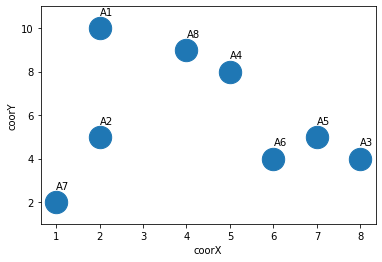

In [2]:
# Indicación del punto
puntos=[f'A{x}' for x in range(1,9)]

# Lectura de .csv y asignación al indice los puntos
coords=pd.read_csv('l5p1.csv')
coords=coords.assign(punto=puntos)
coords.set_index('punto', inplace=True)
# Creación de la columna Cluster que más adelante se rellenará con 1, 2 ó 3
# Creación de la columna distancias que más adelante se rellenara con lista de distancias
coords=coords.assign(distancias=np.NaN, Cluster=np.NaN)
# print(coords)

# Creacion de Scatter
coords.plot.scatter(x='coorX', y='coorY', s=500)

# Asignación del label del punto 0.2 puntos por encima de la coordenada y
for i, txt in enumerate(coords.index):
    plt.annotate(txt, (coords['coorX'].iat[i], coords['coorY'].iat[i]+0.6))

plt.ylim(1,11)
plt.show()

<div style="font-size:14px; text-align:justify"><b>1: </b>Representar los clusters creados y la posición de los centroides después de cada iteración.</div>

Como se menciona en el enunciado del problema, y de acuerdo con este Clustering, se ha de asignar unos centroides iniciales que serán A1, A3 y A4. El calculo de los Cluster se realizará X veces hasta que el resultado de estos no cambie con la iteración anterior.

<div style="font-size:14px; text-align:center"><b>ESTADO INCIAL</b><br></div>

Asignación de los centroides según los puntos indicados y asignar puntos a Cluster según su distancia euclídea menor con respecto todos los centroides.

,coorX,coorY,distancias,Cluster
punto,,,,
A1,2,10,"[0.0, 8.49, 3.61]",1
A2,2,5,"[5.0, 6.08, 4.24]",3
A3,8,4,"[8.49, 0.0, 5.0]",2
A4,5,8,"[3.61, 5.0, 0.0]",3
A5,7,5,"[7.07, 1.41, 3.61]",2
A6,6,4,"[7.21, 2.0, 4.12]",2
A7,1,2,"[8.06, 7.28, 7.21]",3
A8,4,9,"[2.24, 6.4, 1.41]",3


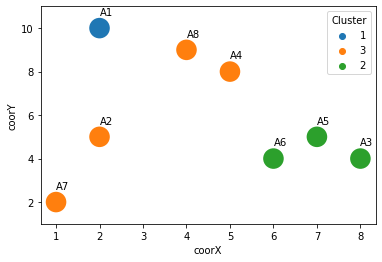

Centroides:  [[2, 10], [8, 4], [5, 8]]


In [3]:
# Paso 1: Asignación de Cluster según centroides y calculo de  centroides
coords.loc['A1', 'Cluster']='1'
coords.loc['A3', 'Cluster']='2'
coords.loc['A4', 'Cluster']='3'
centroides=[[2,10],[8,4],[5,8]]

# Paso 2: Calculo de las distancias con los centroides
def dist_euclidea(punto:list, centroides=list):
    '''
    Calcular distancias en base a los centros del estado inicial
    '''
    # print('Centroides: ', centroides)
    distancias=[]
    for centro in centroides:
        distancia=math.sqrt((punto[0]-centro[0])**2+(punto[1]-centro[1])**2)
        distancias.append(round(distancia,2))
        
    return distancias

        
distancias=[dist_euclidea([coords['coorX'].iat[x], coords.iloc[x]['coorY']], centroides) 
            for x, val in enumerate(coords.index)]
coords['distancias']=distancias

# Paso 3: Asignar cluster por minima distancia
def agrupamiento(grupo_distancias:list):
    '''
    Agrupamos en Cluster según la minima distancia
    '''
    cluster=[]
    for distancias in grupo_distancias:
        if distancias[0]<distancias[1] and distancias[0]<distancias[2]:
            cluster.append('1')
        if distancias[1]<distancias[0] and distancias[1]<distancias[2]:
            cluster.append('2')
        if distancias[2]<distancias[0] and distancias[2]<distancias[1]:
            cluster.append('3')
            
    return cluster
       
    
coords['Cluster']=agrupamiento(coords['distancias'])
display(coords)

# Creacion de Scatter
sns.scatterplot(data=coords, x="coorX", y="coorY", hue="Cluster", s=500)

# Asignación del label del punto 0.2 puntos por encima de la coordenada y
for i, txt in enumerate(coords.index):
    plt.annotate(txt, (coords['coorX'].iat[i], coords['coorY'].iat[i]+0.6))

plt.ylim(1,11)
plt.show()
print('Centroides: ', centroides)

<div style="font-size:14px; text-align:center"><b>ITERACIÓN 1</b><br></div>

Recalcular los centroides de los Cluster obtenidos y comprobar si cambia el ordenamiento de los puntos en los Cluster.

,coorX,coorY,distancias,Cluster
punto,,,,
A1,2,10,"[0.0, 7.56, 4.12]",1
A2,2,5,"[5.0, 5.04, 1.41]",3
A3,8,4,"[8.49, 1.05, 5.39]",2
A4,5,8,"[3.61, 4.18, 2.83]",3
A5,7,5,"[7.07, 0.67, 4.12]",2
A6,6,4,"[7.21, 1.05, 3.61]",2
A7,1,2,"[8.06, 6.44, 4.47]",3
A8,4,9,"[2.24, 5.55, 3.16]",1


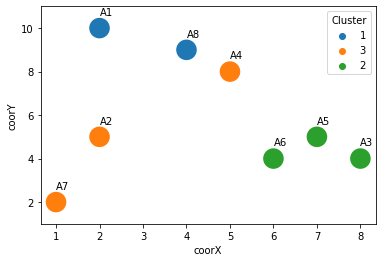

Centroides:  [[2.0, 10.0], [7.0, 4.33], [3.0, 6.0]]


In [4]:
# Paso 1: Recálculo de centroides.
def recalc_centroide(data:pd.DataFrame):
    '''
    Suma de las coordenadas X e Y para cada punto perteneciente al Cluster.
    '''
    # Obtener total de puntos por Cluster
    totales=data[['Cluster']].value_counts().sort_index()
    
    # Obtener la suma de las coordenadas X e Y por Cluster
    data=data.groupby(by=['Cluster']).sum()
    
    # Dividir la coordenada por el total de puntos del Cluster
    centroides=[]
    for i in range(3):
        coordx=round(data.iloc[i][0]/totales.iloc[i],2)
        coordy=round(data.iloc[i][1]/totales.iloc[i],2)
        centroides.append([coordx, coordy])

    return centroides
    
    
centroides=recalc_centroide(coords)  

# Paso 2: Calculo de las distancias con los centroides
distancias=[dist_euclidea([coords['coorX'].iat[x], coords.iloc[x]['coorY']], centroides) 
            for x, val in enumerate(coords.index)]
coords['distancias']=distancias

# Paso 3: Asignar cluster por minima distancia   
coords['Cluster']=agrupamiento(coords['distancias'])

display(coords)

# Creacion de Scatter
sns.scatterplot(data=coords, x="coorX", y="coorY", hue="Cluster", s=500)

# Asignación del label del punto 0.2 puntos por encima de la coordenada y
for i, txt in enumerate(coords.index):
    plt.annotate(txt, (coords['coorX'].iat[i], coords['coorY'].iat[i]+0.6))

plt.ylim(1,11)
plt.show()
print('Centroides: ', centroides)

Varia de Cluster el punto A8 por lo que se vuelve a iterar para recalcular Clusters.

<div style="font-size:14px; text-align:center"><b>ITERACIÓN 2</b><br></div>

,coorX,coorY,distancias,Cluster
punto,,,,
A1,2,10,"[1.12, 7.56, 5.04]",1
A2,2,5,"[4.61, 5.04, 0.67]",3
A3,8,4,"[7.43, 1.05, 5.42]",2
A4,5,8,"[2.5, 4.18, 3.8]",1
A5,7,5,"[6.02, 0.67, 4.33]",2
A6,6,4,"[6.26, 1.05, 3.48]",2
A7,1,2,"[7.76, 6.44, 3.43]",3
A8,4,9,"[1.12, 5.55, 4.22]",1


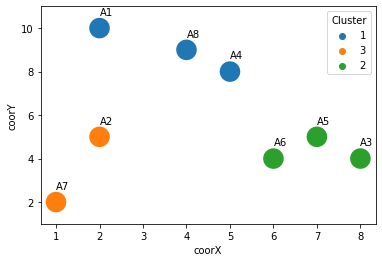

Centroides:  [[3.0, 9.5], [7.0, 4.33], [2.67, 5.0]]


In [5]:
# Paso 1: Recálculo de centroides.  
centroides=recalc_centroide(coords)  

# Paso 2: Calculo de las distancias con los centroides
distancias=[dist_euclidea([coords['coorX'].iat[x], coords.iloc[x]['coorY']], centroides) 
            for x, val in enumerate(coords.index)]
coords['distancias']=distancias

# Paso 3: Asignar cluster por minima distancia   
coords['Cluster']=agrupamiento(coords['distancias'])

display(coords)

# Creacion de Scatter
sns.scatterplot(data=coords, x="coorX", y="coorY", hue="Cluster", s=500)

# Asignación del label del punto 0.2 puntos por encima de la coordenada y
for i, txt in enumerate(coords.index):
    plt.annotate(txt, (coords['coorX'].iat[i], coords['coorY'].iat[i]+0.6))

plt.ylim(1,11)
plt.show()
print('Centroides: ', centroides)

Varia de Cluster el punto A4 por lo que se vuelve a iterar para recalcular Clusters.

<div style="font-size:14px; text-align:center"><b>ITERACIÓN 3</b><br></div>

,coorX,coorY,distancias,Cluster
punto,,,,
A1,2,10,"[1.95, 7.56, 6.52]",1
A2,2,5,"[4.33, 5.04, 1.58]",3
A3,8,4,"[6.61, 1.05, 6.52]",2
A4,5,8,"[1.66, 4.18, 5.7]",1
A5,7,5,"[5.2, 0.67, 5.7]",2
A6,6,4,"[5.52, 1.05, 4.53]",2
A7,1,2,"[7.49, 6.44, 1.58]",3
A8,4,9,"[0.33, 5.55, 6.04]",1


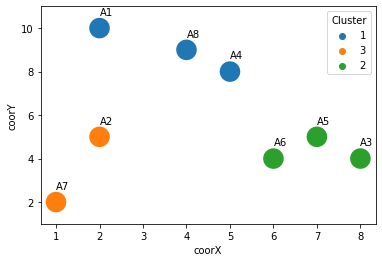

Centroides:  [[3.67, 9.0], [7.0, 4.33], [1.5, 3.5]]


In [6]:
# Paso 1: Recálculo de centroides.  
centroides=recalc_centroide(coords)  

# Paso 2: Calculo de las distancias con los centroides
distancias=[dist_euclidea([coords['coorX'].iat[x], coords.iloc[x]['coorY']], centroides) 
            for x, val in enumerate(coords.index)]
coords['distancias']=distancias

# Paso 3: Asignar cluster por minima distancia   
coords['Cluster']=agrupamiento(coords['distancias'])

display(coords)

# Creacion de Scatter
# ax = coords.plot.scatter(x='coorX', y='coorY')
sns.scatterplot(data=coords, x="coorX", y="coorY", hue="Cluster", s=500)

# Asignación del label del punto 0.2 puntos por encima de la coordenada y
for i, txt in enumerate(coords.index):
    plt.annotate(txt, (coords['coorX'].iat[i], coords['coorY'].iat[i]+0.6))

plt.ylim(1,11)
plt.show()
print('Centroides: ', centroides)

No ha variado los puntos por lo que se finaliza de realizar las iteraciones para el cálculo del cluster siendo el resultado final el obtenido en esta iteración.

<div style="font-size:14px; text-align:justify"><b>2: </b>El valor de la métrica SSE.</div>

Como métrica más empleada para la evaluación del *clustering* está la suma de errores cuadráticos (SSE). Esta se calcula a partir de la suma de las distancias al cuadrado de cada patrón con respecto a su centroide.

In [7]:
# Paso 1: Calculo de las distancias al centroide
distancias=[min(coords.iloc[x]['distancias']) for x, val in enumerate(coords.index)]

# Paso 2: Calculo de SSE
sse=round(sum([x**2 for x in distancias]), 2)
print('El valor de la métrica SSE: ', sse)

El valor de la métrica SSE:  14.31


<div style="font-size:14px; text-align:justify"><b>PROBLEMA II.-</b><br></div>

Dada la siguiente matriz de distancias entre cinco patrones:

In [8]:
data={'A':[np.NaN, 1, 2, 9, 10], 'B':[1, np.NaN, 3, 7, 5],
     'C':[2, 3, np.NaN, 4, 6], 'D':[9, 7, 4, np.NaN, 8],
     'E':[10, 5, 6, 8, np.NaN]}
df_distancias=pd.DataFrame(data=data, index=['A', 'B', 'C', 'D', 'E'])

# data={'A':[0,1,4,5], 'B':[1,0,2,6],
#      'C':[4,2,0,3], 'D':[5,6,3,0]}
# df_distancias=pd.DataFrame(data=data, index=['A', 'B', 'C', 'D'])

df_distancias

,A,B,C,D,E
A,NaN,1.0,2.0,9.0,10.0
B,1.0,NaN,3.0,7.0,5.0
C,2.0,3.0,NaN,4.0,6.0
D,9.0,7.0,4.0,NaN,8.0
E,10.0,5.0,6.0,8.0,NaN


Se pide:
1. Aplicar un clustering jerárquico con el método de enlace simple.
2. Aplicar un clustering jerárquico con el método de enlace completo.
3. ¿Se podría usar el método de enlace medio con estos datos? Justifica la respuesta.

<div style="font-size:14px; text-align:justify"><b>1: </b>Aplicar un clustering jerárquico con el método de enlace simple.</div>

Para la agrupación de Clusters, se escoge la menor distancia entre estos.

<div style="font-size:14px; text-align:center"><b>ESTADO INCIAL</b><br></div>

La distancia entre A y B es la menor por lo que este será C1. Como resultado quedaría: C1(A, B); C2(C); C3(D); C4(E)

<div style="font-size:14px; text-align:center"><b>ITERACIÓN 1</b><br></div>

In [9]:
# Hallar la distancia minima entre Cluster y elegir la union de Cluster según la menor de estas.

# Distancia C1 y C2 -> min(d(A,C),d(B,C))
# Distancia C1 y C3 -> min(d(A,D),d(B,D))
# Distancia C1 y C4 -> min(d(A,E),d(B,E))
d_C1C2=min([df_distancias.loc['A']['C'], df_distancias.loc['B']['C']])
d_C1C3=min([df_distancias.loc['A']['D'], df_distancias.loc['B']['D']])
d_C1C4=min([df_distancias.loc['A']['E'], df_distancias.loc['B']['E']])
# Distancia C2 y C3 -> min(d(C, D))
# Distancia C2 y C4 -> min(d(C, E))
d_C2C3=df_distancias.loc['C']['D']
d_C2C4=df_distancias.loc['C']['E']
# Distancia C3 y C4 -> min(d(D, E))
d_C3C4=df_distancias.loc['D']['E']

res=[d_C1C2, d_C1C3, d_C1C4, d_C2C3, d_C2C4, d_C3C4]

print('De las distancias ',res,' la menor resulta ', min(res))

De las distancias  [2.0, 7.0, 5.0, 4.0, 6.0, 8.0]  la menor resulta  2.0


La distancia entre C1 y C2 es la menor por lo que se añade a C1 el punto C. Como resultado quedaría: C1(A, B, (C)); C2(D); C3(E)

<div style="font-size:14px; text-align:center"><b>ITERACIÓN 2</b><br></div>

In [10]:
# Hallar la distancia minima entre Cluster y elegir la union de Cluster según la menor de estas.

# Distancia C1 y C2 -> min(d(A,D),d(B,D),d(C,D))
# Distancia C1 y C3 -> min(d(A,E),d(B,E),d(C,E))
d_C1C2=min([df_distancias.loc['A']['D'], df_distancias.loc['B']['D'], df_distancias.loc['C']['D']])
d_C1C3=min([df_distancias.loc['A']['E'], df_distancias.loc['B']['E'], df_distancias.loc['C']['E']])
# Distancia C2 y C3 -> min(d(D, E))
d_C2C3=df_distancias.loc['D']['E']

res=[d_C1C2, d_C1C3, d_C2C3]

print('De las distancias ',res,' la menor resulta ', min(res))

De las distancias  [4.0, 5.0, 8.0]  la menor resulta  4.0


La distancia entre C1 y C2 es la menor por lo que se añade a C1 el punto D. Como resultado quedaría: C1((A, B, (C)), D); C2(E)

<div style="font-size:14px; text-align:center"><b>ITERACIÓN 3</b><br></div>

Dado que solo queda un punto por unir, este se añade a C1, quedando finalmente el resultado del clustering jerarquico: C1((((AB)C)D)E)

C:\Users\vicsi\AppData\Local\Temp\ipykernel_8376\1592421344.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(x, 'single')


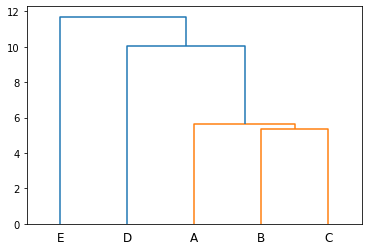

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Obtener los datos a mostrar
x=df_distancias.fillna(0)
x=x.to_numpy() 
# Calculo del clustering por el método de enlace simple
Z = linkage(x, 'single')
 
# Ploteo de resultado
dendrogram(Z, labels=df_distancias.index)
plt.show()

<div style="font-size:14px; text-align:justify"><b>2: </b>Aplicar un clustering jerárquico con el método de enlace completo.</div>

Para la agrupación de Clusters, se escoge la mayor distancia entre estos.

<div style="font-size:14px; text-align:center"><b>ESTADO INCIAL</b><br></div>

La distancia entre A y B es la menor por lo que este será C1. Como resultado quedaría: C1(A, B); C2(C); C3(D); C4(E)

<div style="font-size:14px; text-align:center"><b>ITERACIÓN 1</b><br></div>

In [12]:
# Hallar la distancia maxima entre Cluster y elegir la union de Cluster según la menor de estas.

# Distancia C1 y C2 -> max(d(A,C),d(B,C))
# Distancia C1 y C3 -> max(d(A,D),d(B,D))
# Distancia C1 y C4 -> max(d(A,E),d(B,E))
d_C1C2=max([df_distancias.loc['A']['C'], df_distancias.loc['B']['C']])
d_C1C3=max([df_distancias.loc['A']['D'], df_distancias.loc['B']['D']])
d_C1C4=max([df_distancias.loc['A']['E'], df_distancias.loc['B']['E']])
# Distancia C2 y C3 -> max(d(C, D))
# Distancia C2 y C4 -> max(d(C, E))
d_C2C3=df_distancias.loc['C']['D']
d_C2C4=df_distancias.loc['C']['E']
# Distancia C3 y C4 -> max(d(D, E))
d_C3C4=df_distancias.loc['D']['E']

res=[d_C1C2, d_C1C3, d_C1C4, d_C2C3, d_C2C4, d_C3C4]

print('De las distancias ',res,' la menor resulta ', min(res))

De las distancias  [3.0, 9.0, 10.0, 4.0, 6.0, 8.0]  la menor resulta  3.0


La distancia entre C1 y C2 es la mayor por lo que se añade a C1 el punto C. Como resultado quedaría: C1(A, B, (C)); C2(D); C3(E)

<div style="font-size:14px; text-align:center"><b>ITERACIÓN 2</b><br></div>

In [13]:
# Hallar la distancia maxima entre Cluster y elegir la union de Cluster según la menor de estas.

# Distancia C1 y C2 -> min(d(A,D),d(B,D),d(C,D))
# Distancia C1 y C3 -> min(d(A,E),d(B,E),d(C,E))
d_C1C2=max([df_distancias.loc['A']['D'], df_distancias.loc['B']['D'], df_distancias.loc['C']['D']])
d_C1C3=max([df_distancias.loc['A']['E'], df_distancias.loc['B']['E'], df_distancias.loc['C']['E']])
# Distancia C2 y C3 -> min(d(D, E))
d_C2C3=df_distancias.loc['D']['E']

res=[d_C1C2, d_C1C3, d_C2C3]

print('De las distancias ',res,' la menor resulta ', min(res))

De las distancias  [9.0, 10.0, 8.0]  la menor resulta  8.0


La distancia entre C2 y C3 es la menor por lo que se añade a C2 el punto E. Como resultado quedaría: C1((A, B, (C))); C2(D, E)

<div style="font-size:14px; text-align:center"><b>ITERACIÓN 3</b><br></div>

Dado que solo queda un punto por unir, este se añade a C1, quedando finalmente el resultado del clustering jerarquico: C1((((AB)C)(DE))

C:\Users\vicsi\AppData\Local\Temp\ipykernel_8376\2961250973.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(x, 'complete')


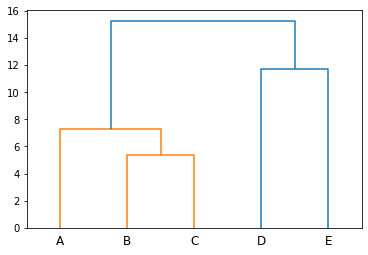

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Obtener los datos a mostrar
x=df_distancias.fillna(0)
x=x.to_numpy() 
# Calculo del clustering por el método de enlace simple
Z = linkage(x, 'complete')
 
# Ploteo de resultado
dendrogram(Z, labels=df_distancias.index)
plt.show()

<div style="font-size:14px; text-align:justify"><b>2: </b>¿Se podría usar el método de enlace medio con estos datos? Justifica la respuesta.</div>

Si que se podría emplear el método de enlace medio. Para obtener este, se calcula la media de las distancias entre los puntos de los clusters. Y dado que si se realiza la media de una única distancia aportada en el enunciado, su calculo sería la división de esta entre 1, no hay ningún problema matemático para el cálculo.

C:\Users\vicsi\AppData\Local\Temp\ipykernel_8376\2634135672.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(x, 'average')


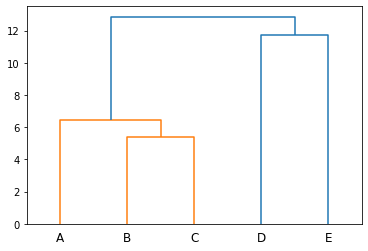

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Obtener los datos a mostrar
x=df_distancias.fillna(0)
x=x.to_numpy() 
# Calculo del clustering por el método de enlace simple
Z = linkage(x, 'average')
 
# Ploteo de resultado
dendrogram(Z, labels=df_distancias.index)
plt.show()

Como se observa en el dendrograma, si sería posible y además, las uniones resultarian ser como para el método completo pero con diferencia en las distancias entre clusters.

<div style="font-size:14px; text-align:justify"><b>PROBLEMA III.-</b><br></div>

Dados los mismos puntos del Problema I.

Se pide:
1. Aplicar DBSCAN considerando 𝑀 = 3 y ϵ = √2.
2. Aplicar DBSCAN considerando 𝑀 = 3 y ϵ = √10.
3. ¿En qué afecta el cambio del parámetro ϵ ?

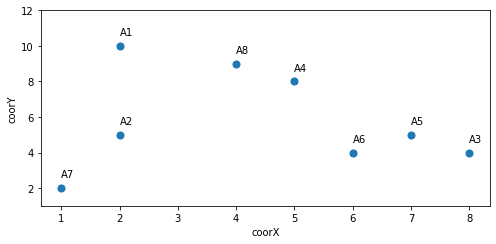

In [227]:
# Indicación del punto
puntos=[f'A{x}' for x in range(1,9)]

# Lectura de .csv y asignación al indice los puntos
coords=pd.read_csv('l5p1.csv')
coords=coords.assign(punto=puntos)
coords.set_index('punto', inplace=True)
# Creación de la columna Cluster que más adelante se rellenará con 1, 2 ó 3
# Creación de la columna distancias que más adelante se rellenara con lista de distancias
coords=coords.assign(distancias=np.NaN, Cluster=np.NaN)
# print(coords)

# Creacion de Scatter
coords.plot.scatter(x='coorX', y='coorY', s=50)

# Asignación del label del punto 0.2 puntos por encima de la coordenada y
for i, txt in enumerate(coords.index):
    plt.annotate(txt, (coords['coorX'].iat[i], coords['coorY'].iat[i]+0.6))

plt.ylim(1,12)
plt.show()

<div style="font-size:14px; text-align:justify"><b>1: </b>Aplicar DBSCAN considerando 𝑀 = 3 y ϵ = √2.</div>

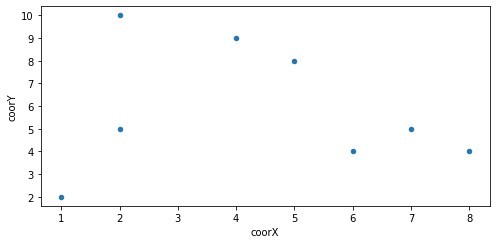

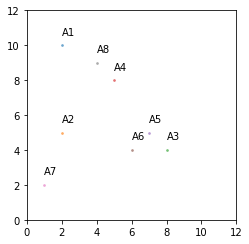

In [142]:
# Radio de DBSCAN
RADIO = math.sqrt(2)

# Representacion de los datos
# Parametrizació
fig, ax = plt.subplots(figsize=[5,10])

ax.set(xlim=(0, 10), ylim = (0, 12))

fig = plt.scatter(x=coords['coorX'], y=coords['coorY'])

RADIO = math.sqrt(2)

for i, txt in enumerate(coords.index):
    plt.annotate(txt, (coords['coorX'].iat[i], coords['coorY'].iat[i]+0.6))
    ax.add_artist(plt.Circle((coords['coorX'].iat[i], coords['coorY'].iat[i]),
                             RADIO, color='r', alpha=0.3))

ax.set_aspect('equal', 'box')




# # Imprimir los datos
# # fig, ax = plt.subplots()
# # coords.plot.scatter(x='coorX', y='coorY')
# # plt.scatter(x=coords['coorX'], y=coords['coorY'])

# # Asignación del label del punto 0.2 puntos por encima de la coordenada y
# result=math.sqrt(2)
# result=1

# # fig,ax = plt.subplots(figsize=[7,7])
# fig,ax = plt.subplots()
# # set limits BEFORE plotting
# ax.set_xlim((0,12))
# ax.set_ylim((0,12))
# # radius in data coordinates:
# r = 0.5 # units
# # radius in display coordinates:
# r_ = ax.transData.transform([r,0])[0] - ax.transData.transform([0,0])[0] # points
# # marker size as the area of a circle
# marker_size = math.pi * result**2


# # circles=[]
# for i, txt in enumerate(coords.index):
#     plt.annotate(txt, (coords['coorX'].iat[i], coords['coorY'].iat[i]+0.6))
#     plt.scatter(coords['coorX'].iat[i], coords['coorY'].iat[i], s = marker_size, alpha = 0.5)
#     # circles.append(plt.scatter(coords['coorX'].iat[i], coords['coorY'].iat[i], s = result*10000, alpha = 0.5))
#     # ax.add_patch(plt.scatter(coords['coorX'].iat[i], coords['coorY'].iat[i], s = result*1000, alpha = 0.5))
#     # plt.Circle((coords['coorX'].iat[i], coords['coorY'].iat[i]), result)
#     # plt.scatter(coords['coorX'].iat[i], coords['coorY'].iat[i], marker = 'o', s = result, alpha = 0.2)


# # plt.ylim(0,12)
# # plt.xlim(0,9)
# # # ax.add_patch(circles)

# # plt.autoscale=True

# ax.set_aspect(1)
# plt.show()

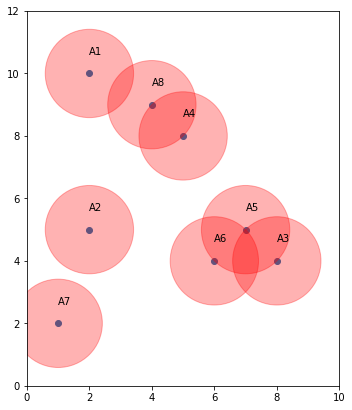

In [228]:

fig, ax = plt.subplots(figsize=[5,10])

ax.set(xlim=(0, 10), ylim = (0, 12))

fig = plt.scatter(x=coords['coorX'], y=coords['coorY'])

RADIO = math.sqrt(2)

for i, txt in enumerate(coords.index):
    plt.annotate(txt, (coords['coorX'].iat[i], coords['coorY'].iat[i]+0.6))
    ax.add_artist(plt.Circle((coords['coorX'].iat[i], coords['coorY'].iat[i]),
                             RADIO, color='r', alpha=0.3))

ax.set_aspect('equal', 'box')